# FIR filter with Windowing method

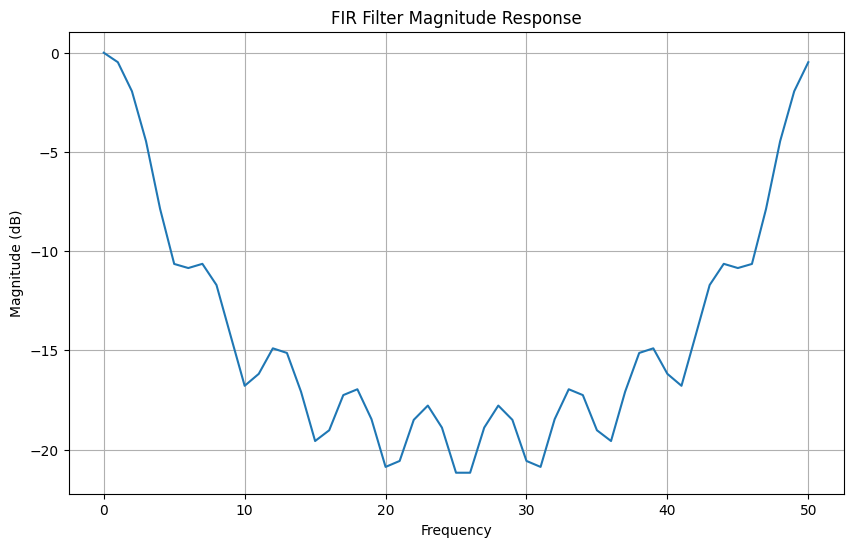

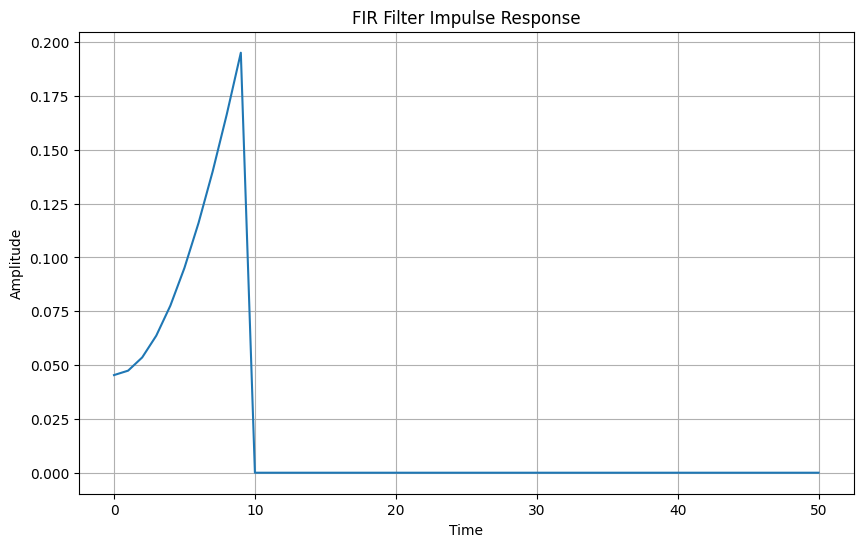

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def design_fir_filter(cutoff_freq, filter_length, window_type):
    # Convert normalized cutoff frequency to an integer index
    cutoff_index = int(cutoff_freq * filter_length)

    # Design the ideal frequency response (low-pass filter)
    ideal_freq_response = np.ones(filter_length)
    ideal_freq_response[cutoff_index:] = 0

    # Apply the selected window function
    if window_type.lower() == 'hamming':
        window = np.hamming(filter_length)
    elif window_type.lower() == 'hann':
        window = np.hanning(filter_length)
    else:
        raise ValueError(f"Unknown window type: {window_type}")
    
    filter_coefficients = ideal_freq_response * window

    # Normalize the filter coefficients
    filter_coefficients /= np.sum(filter_coefficients)

    return filter_coefficients

def plot_filter_response(filter_coefficients):
    # Compute the frequency response of the filter
    frequency_response = np.fft.fft(filter_coefficients)

    # Compute the magnitude response in dB
    magnitude_response = 20 * np.log10(np.abs(frequency_response))

    # Plot the magnitude response
    plt.figure(figsize=(10, 6))
    plt.plot(magnitude_response)
    plt.title('FIR Filter Magnitude Response')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)
    plt.show()

    # Compute the impulse response of the filter
    impulse_response = np.fft.ifft(frequency_response)

    # Plot the impulse response
    plt.figure(figsize=(10, 6))
    plt.plot(impulse_response.real)
    plt.title('FIR Filter Impulse Response')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Specify the desired filter specifications
cutoff_frequency = 0.2  # Normalized cutoff frequency (0.0 to 0.5)
filter_length = 51  # Number of filter coefficients
window_type = 'hamming'  # Type of window function

# Design the FIR filter using the windowing method
filter_coefficients = design_fir_filter(cutoff_frequency, filter_length, window_type)

# Plot the filter's magnitude response and impulse response
plot_filter_response(filter_coefficients)

# Save the filter coefficients (optional)
# filter_path = 'fir_filter_coefficients.txt'
# np.savetxt(filter_path, filter_coefficients, delimiter=',')
# print(f"Filter coefficients saved at: {filter_path}")

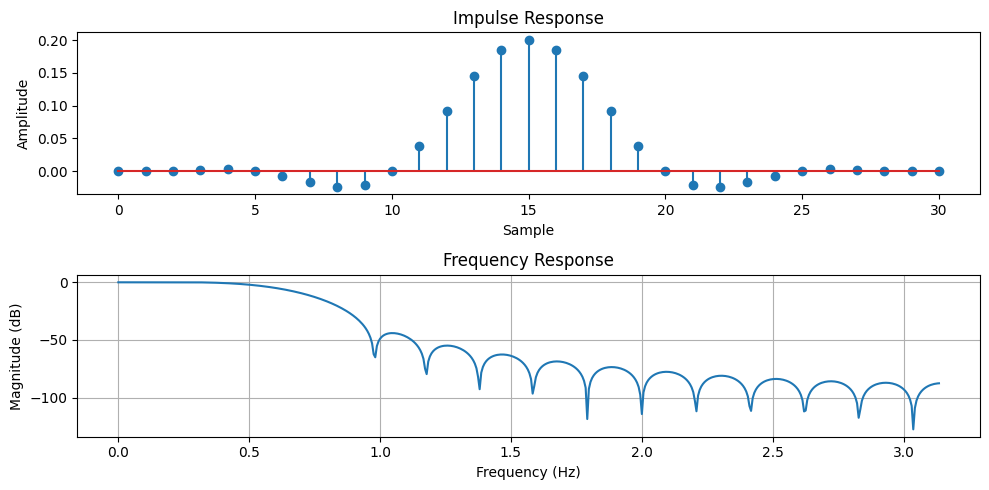

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz

# Filter parameters
cutoff_frequency = 0.2  # Normalized cutoff frequency (0.0 to 0.5)
filter_length = 31      # Number of filter taps (odd for symmetry)

# Design the FIR filter using Hanning window method
filter_coefficients = firwin(filter_length, cutoff=cutoff_frequency, window='hann')

# Plot the impulse response of the filter
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.stem(filter_coefficients)
plt.title("Impulse Response")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Plot the frequency response of the filter
plt.subplot(2, 1, 2)
frequencies, response = freqz(filter_coefficients)
plt.plot(frequencies, 20 * np.log10(np.abs(response)))
plt.title("Frequency Response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)

plt.tight_layout()
plt.show()
